

**If you are planning on going out to see a movie, how well can you trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?**


### Goal:

**Our goal is to analyse data of Fandango movie website and reach a conclusion.**


## Part One: Understanding the Background and Data


**The article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**


### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [ ]:
# IMPORT HERE!


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.


In [ ]:
fandango = pd.read_csv("fandango_scrape.csv")


In [ ]:
fandango.head()


,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
fandango.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
fandango.describe()


,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

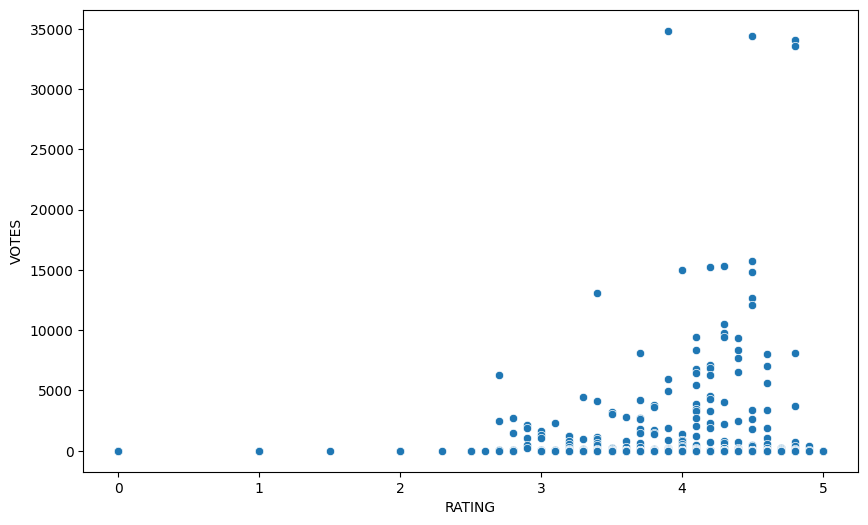

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = fandango , x = 'RATING' , y = 'VOTES')


In [ ]:
fandango.corr(numeric_only = True)


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [ ]:
def year_strip(a):
    return a.split(' ')[-1].strip('()')


In [ ]:
fandango['YEAR'] = np.vectorize(year_strip)(fandango['FILM'])


In [ ]:
fandango['YEAR'].value_counts()


YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

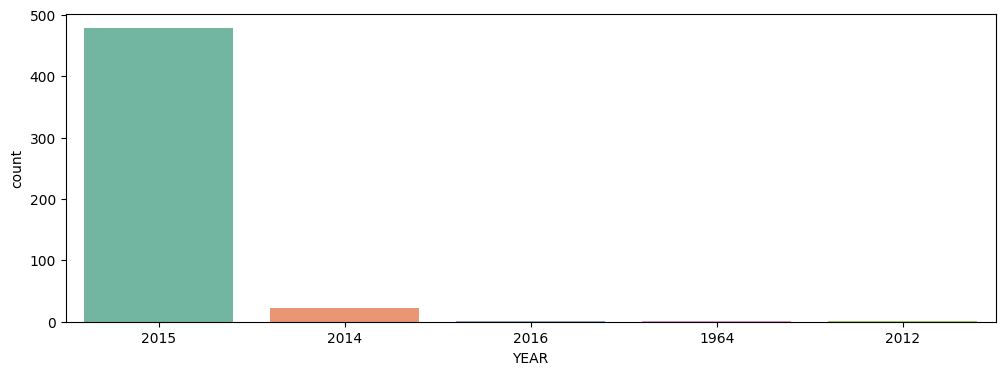

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(data = fandango , x = 'YEAR',hue = 'YEAR',palette = 'Set2')


In [ ]:
fandango.nlargest(10,'VOTES')


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [ ]:
len(fandango[fandango['VOTES'] == 0])


69

In [ ]:
fandango = fandango[fandango['VOTES'] != 0]


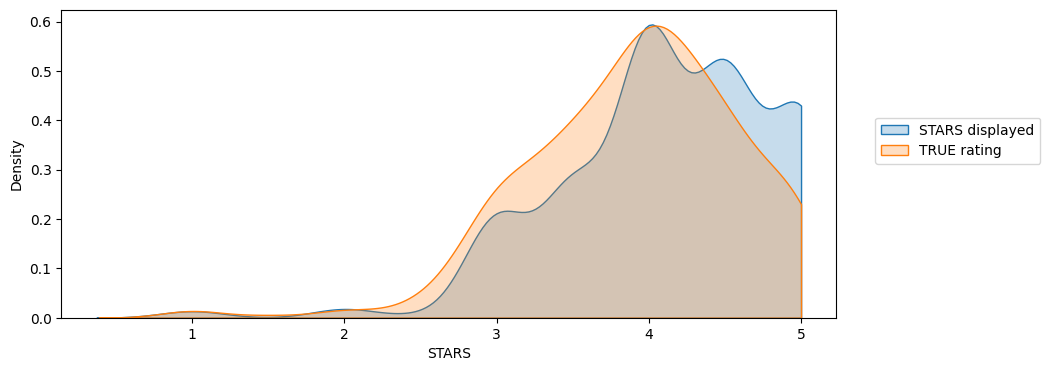

In [ ]:
plt.figure(figsize = (10,4))
sns.kdeplot(data = fandango , x = 'STARS',clip = [0,5] ,fill = True,label = 'STARS displayed')
sns.kdeplot(data = fandango , x = 'RATING',clip = [0,5] ,fill = True,label = 'TRUE rating')
plt.legend(loc = [1.05,0.5])


In [ ]:
help(sns.kdeplot)


Help on function kdeplot in module seaborn.distributions:

kdeplot(data=None, *, x=None, y=None, hue=None, weights=None, palette=None, hue_order=None, hue_norm=None, color=None, fill=None, multiple='layer', common_norm=True, common_grid=False, cumulative=False, bw_method='scott', bw_adjust=1, warn_singular=True, log_scale=None, levels=10, thresh=0.05, gridsize=200, cut=3, clip=None, legend=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Plot univariate or bivariate distributions using kernel density estimation.
    
    A kernel density estimate (KDE) plot is a method for visualizing the
    distribution of observations in a dataset, analogous to a histogram. KDE
    represents the data using a continuous probability density curve in one or
    more dimensions.
    
    The approach is explained further in the :ref:`user guide <tutorial_kde>`.
    
    Relative to a histogram, KDE can produce a plot that is less cluttered and
    more interpretable, especially whe

**Let's now actually quantify this discrepancy.Let's create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [ ]:
fandango['STARS_DIFF'] = np.round(fandango['STARS'] - fandango['RATING'],2)


In [ ]:
fandango


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='count'>

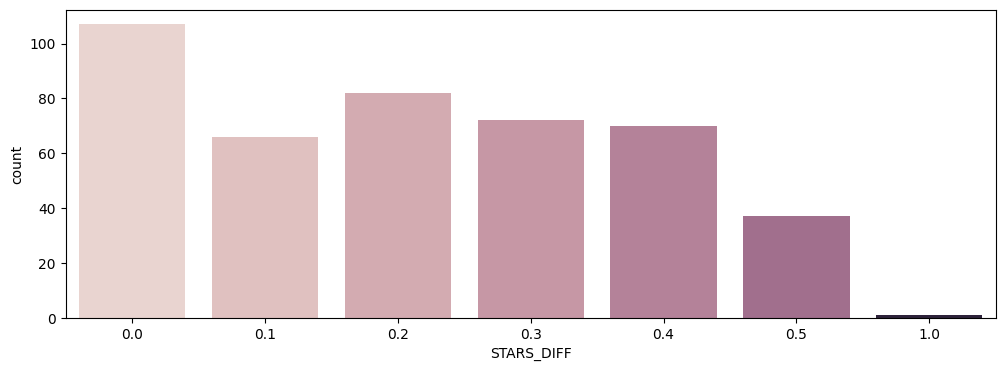

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(data = fandango , x = 'STARS_DIFF',hue = 'STARS_DIFF',legend = False)


**We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [ ]:
fandango[fandango['STARS_DIFF'] == 1]


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Let's now compare the scores from Fandango to other movies sites and see how they compare

In [ ]:
all_sites = pd.read_csv("all_sites_scores.csv")


In [ ]:
all_sites.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [ ]:
all_sites.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


In [ ]:
all_sites.head()


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 



(0.0, 100.0)

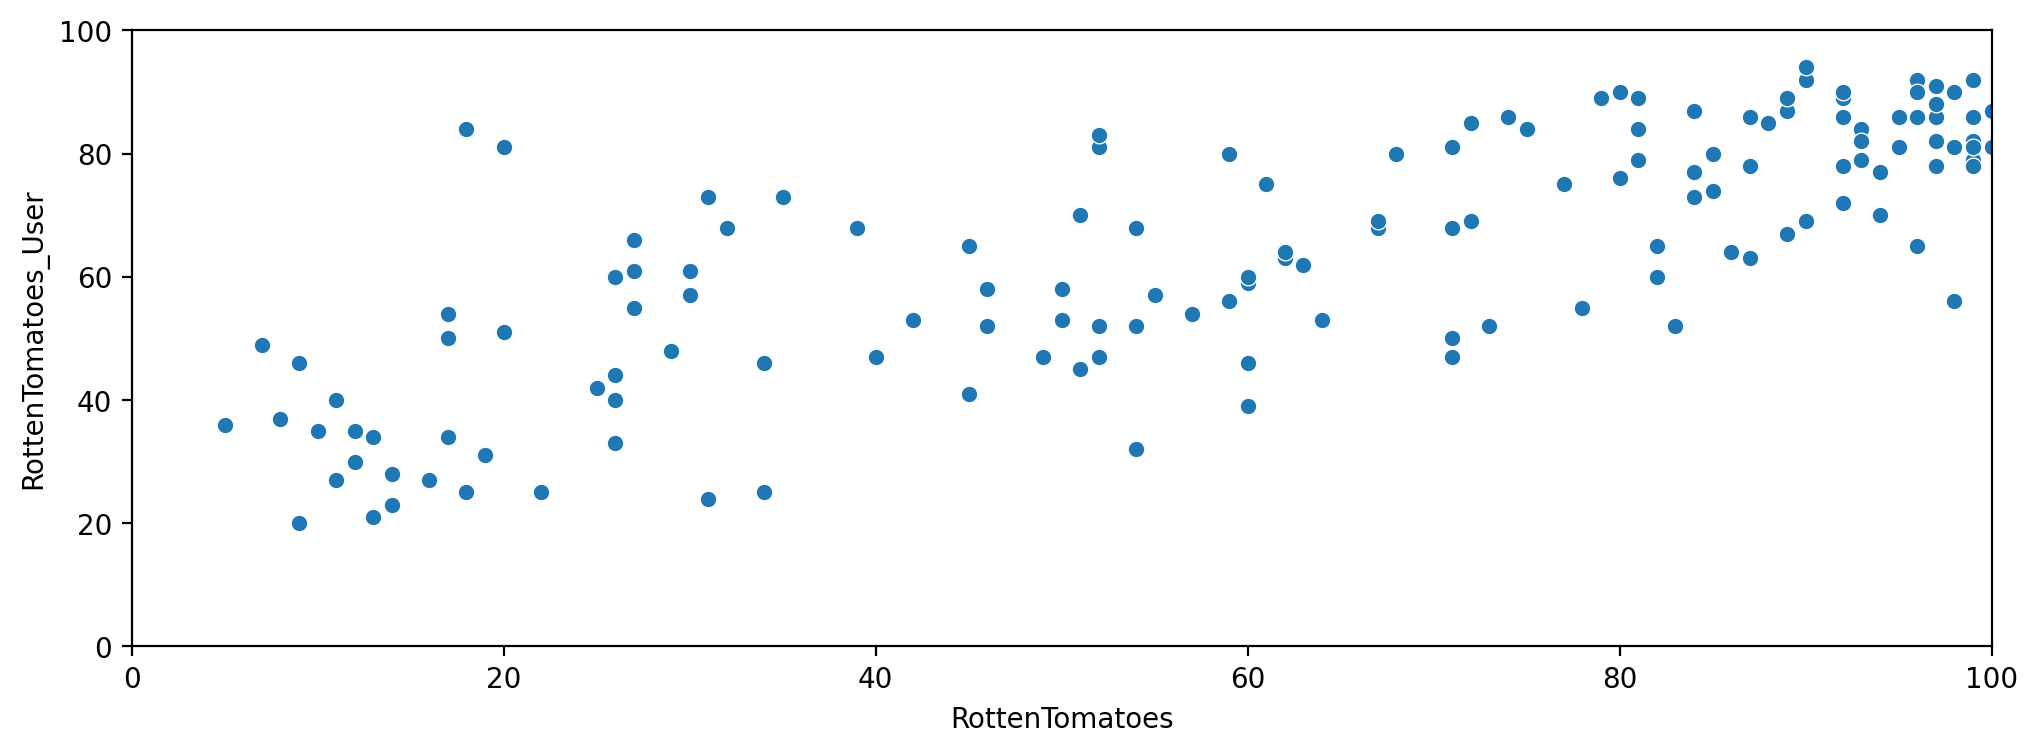

In [ ]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.scatterplot(data = all_sites , x = 'RottenTomatoes' , y = 'RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)


Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

In [ ]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [ ]:
abs(all_sites['Rotten_Diff']).mean()


np.float64(15.095890410958905)

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

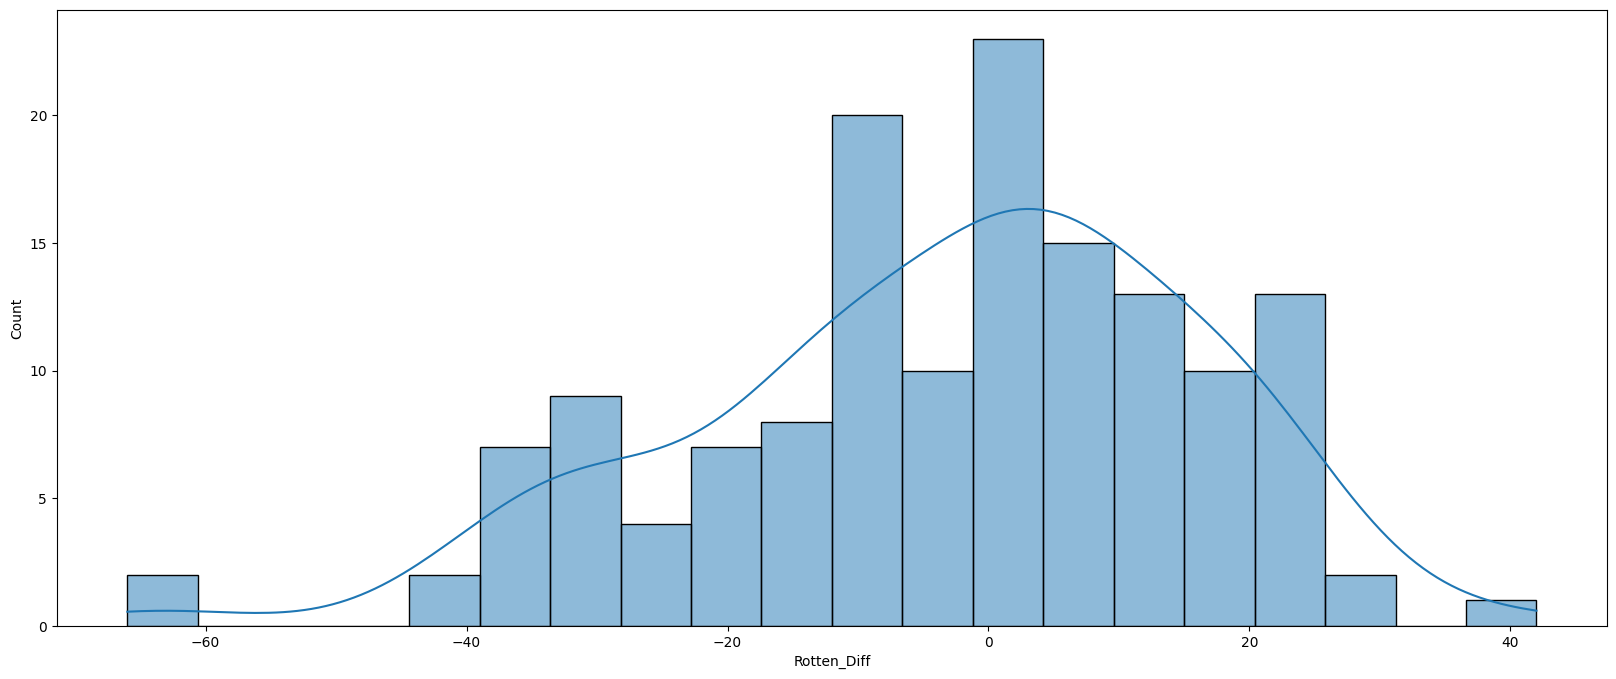

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data = all_sites , x = 'Rotten_Diff' ,bins = 20 , kde = True)


<Axes: xlabel='Rotten_Diff', ylabel='Count'>

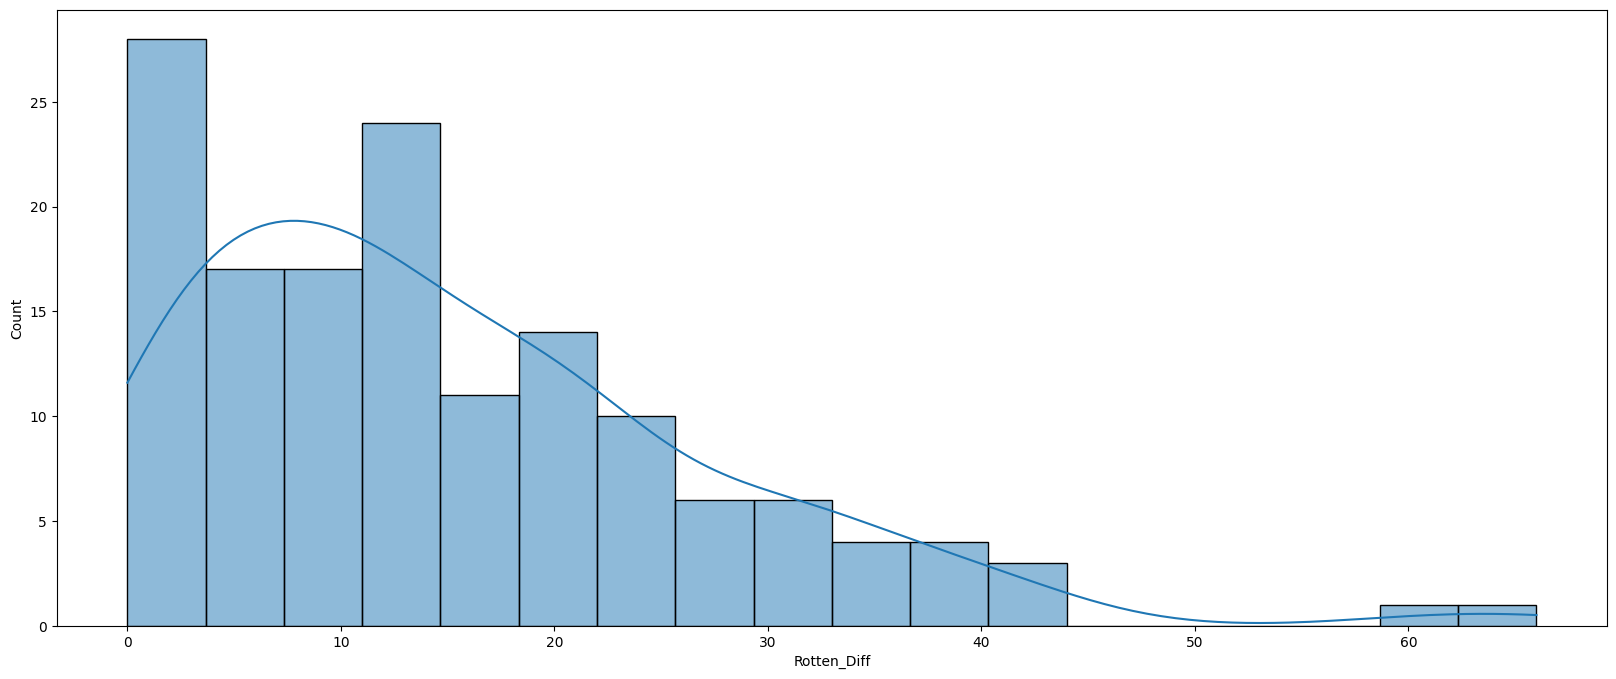

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(x = abs(all_sites['Rotten_Diff']) ,bins = 18 , kde = True)


**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

In [ ]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [ ]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

(0.0, 10.0)

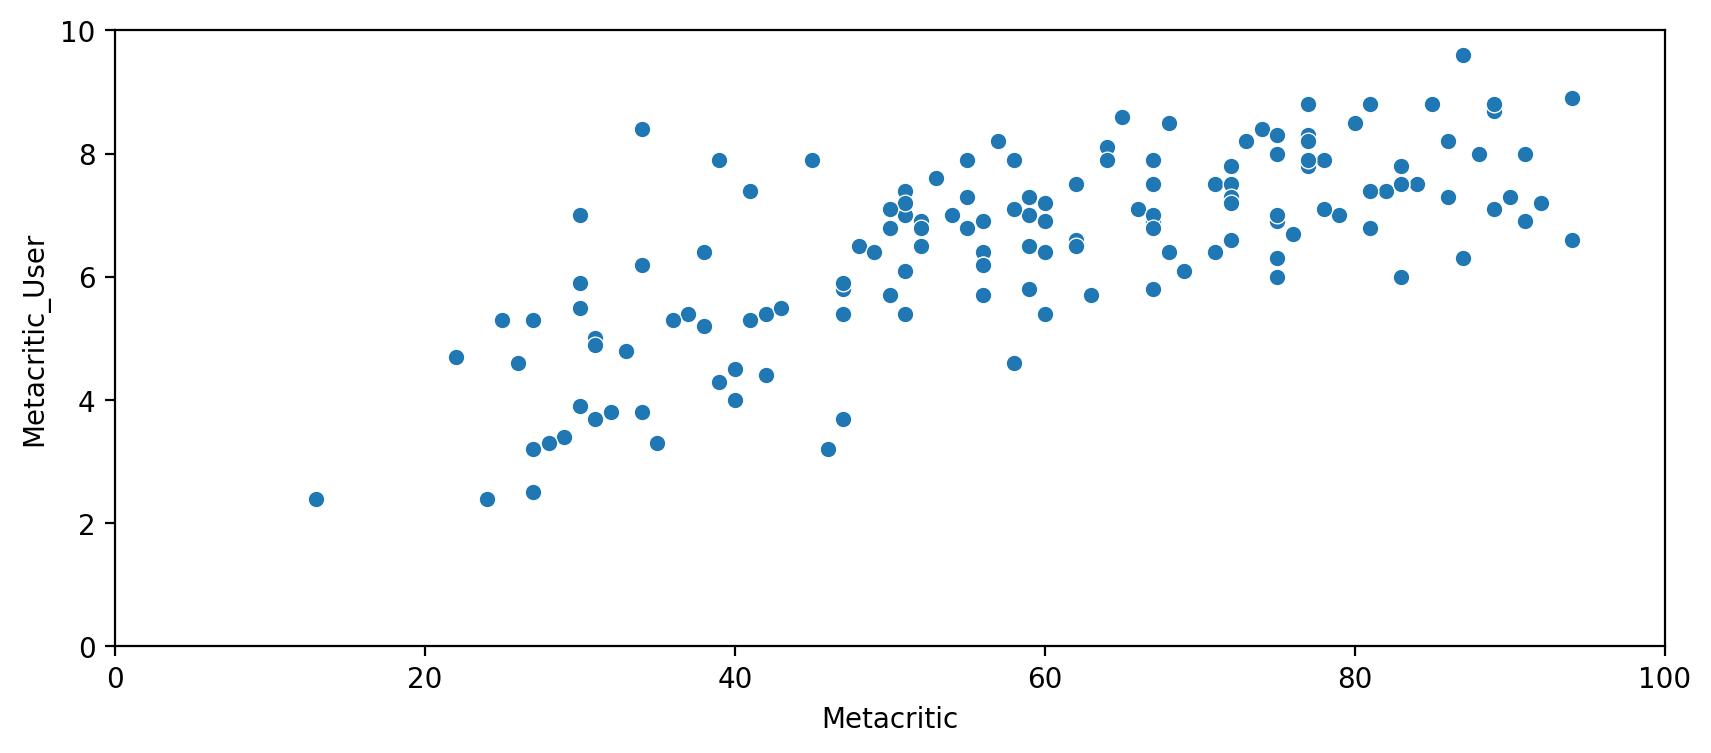

In [ ]:
plt.figure(figsize = (10,4),dpi = 200)
sns.scatterplot(data = all_sites , x = 'Metacritic' , y = 'Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)


## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.


<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

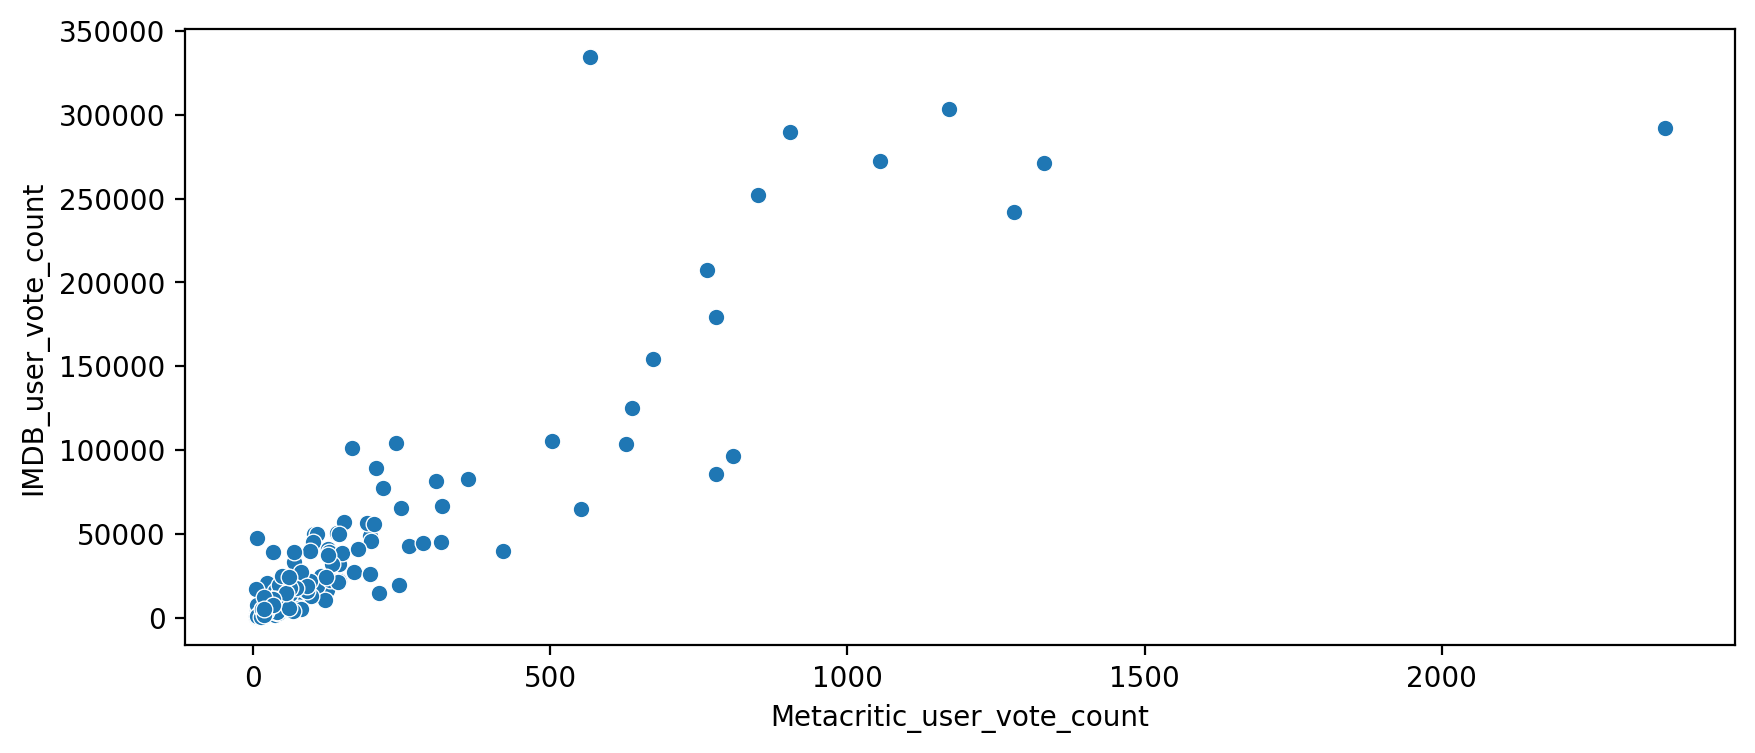

In [ ]:
plt.figure(figsize = (10,4) , dpi = 200)
sns.scatterplot(data = all_sites , x = 'Metacritic_user_vote_count' , y = 'IMDB_user_vote_count')


**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

In [ ]:
all_sites[all_sites['IMDB_user_vote_count'] == all_sites['IMDB_user_vote_count'].max()]


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [ ]:
all_sites[all_sites['Metacritic_user_vote_count'] == all_sites['Metacritic_user_vote_count'].max()]


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

In [ ]:
complete_sites = pd.merge(fandango , all_sites , on = 'FILM' , how = 'inner' )


In [ ]:
complete_sites.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [ ]:
complete_sites.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
STARS,145.0,4.086207,0.541169,3.0,3.5,4.0,4.5,5.0
RATING,145.0,3.841379,0.502437,2.7,3.5,3.9,4.2,4.8
VOTES,145.0,3817.696552,6368.668671,35.0,218.0,1430.0,4279.0,34846.0
STARS_DIFF,145.0,0.244828,0.152721,0.0,0.1,0.2,0.4,0.5
RottenTomatoes,145.0,60.634483,30.161098,5.0,31.0,63.0,89.0,100.0
RottenTomatoes_User,145.0,63.696552,19.974749,20.0,50.0,66.0,81.0,94.0
Metacritic,145.0,58.696552,19.538183,13.0,43.0,59.0,75.0,94.0
Metacritic_User,145.0,6.508966,1.510883,2.4,5.7,6.8,7.5,9.6
IMDB,145.0,6.729655,0.957944,4.0,6.3,6.9,7.4,8.6
Metacritic_user_vote_count,145.0,184.489655,317.361740,4.0,33.0,72.0,167.0,2375.0


In [ ]:
complete_sites.head()


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


In [ ]:
complete_sites = complete_sites.drop('STARS_DIFF' , axis = 1)


In [ ]:
complete_sites.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Normalize columns to Fandango STARS and RATINGS 0-5 

In [ ]:
complete_sites['RT_NORM'] = round(complete_sites['RottenTomatoes'] / 20,1)
complete_sites['RTU_NORM'] = round(complete_sites['RottenTomatoes_User'] / 20,1)
complete_sites['Meta_Norm'] = round(complete_sites['Metacritic'] / 20,1)
complete_sites['Meta_U_Norm'] = round(complete_sites['Metacritic_User'] / 2,1)
complete_sites['IMDB_NORM'] = round(complete_sites['IMDB'] / 2,1)


In [ ]:
complete_sites.head()


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_NORM,RTU_NORM,Meta_Norm,Meta_U_Norm,IMDB_NORM
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [ ]:
norm_scores = complete_sites[['STARS' , 'RATING' , 'RT_NORM' , 'RTU_NORM' , 'Meta_Norm' , 'Meta_U_Norm' , 'IMDB_NORM']]


In [ ]:
norm_scores.head()


,STARS,RATING,RT_NORM,RTU_NORM,Meta_Norm,Meta_U_Norm,IMDB_NORM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [ ]:
len(norm_scores)


145

### Comparing Distribution of Scores Across Sites

Text(0, 0.5, 'Density')

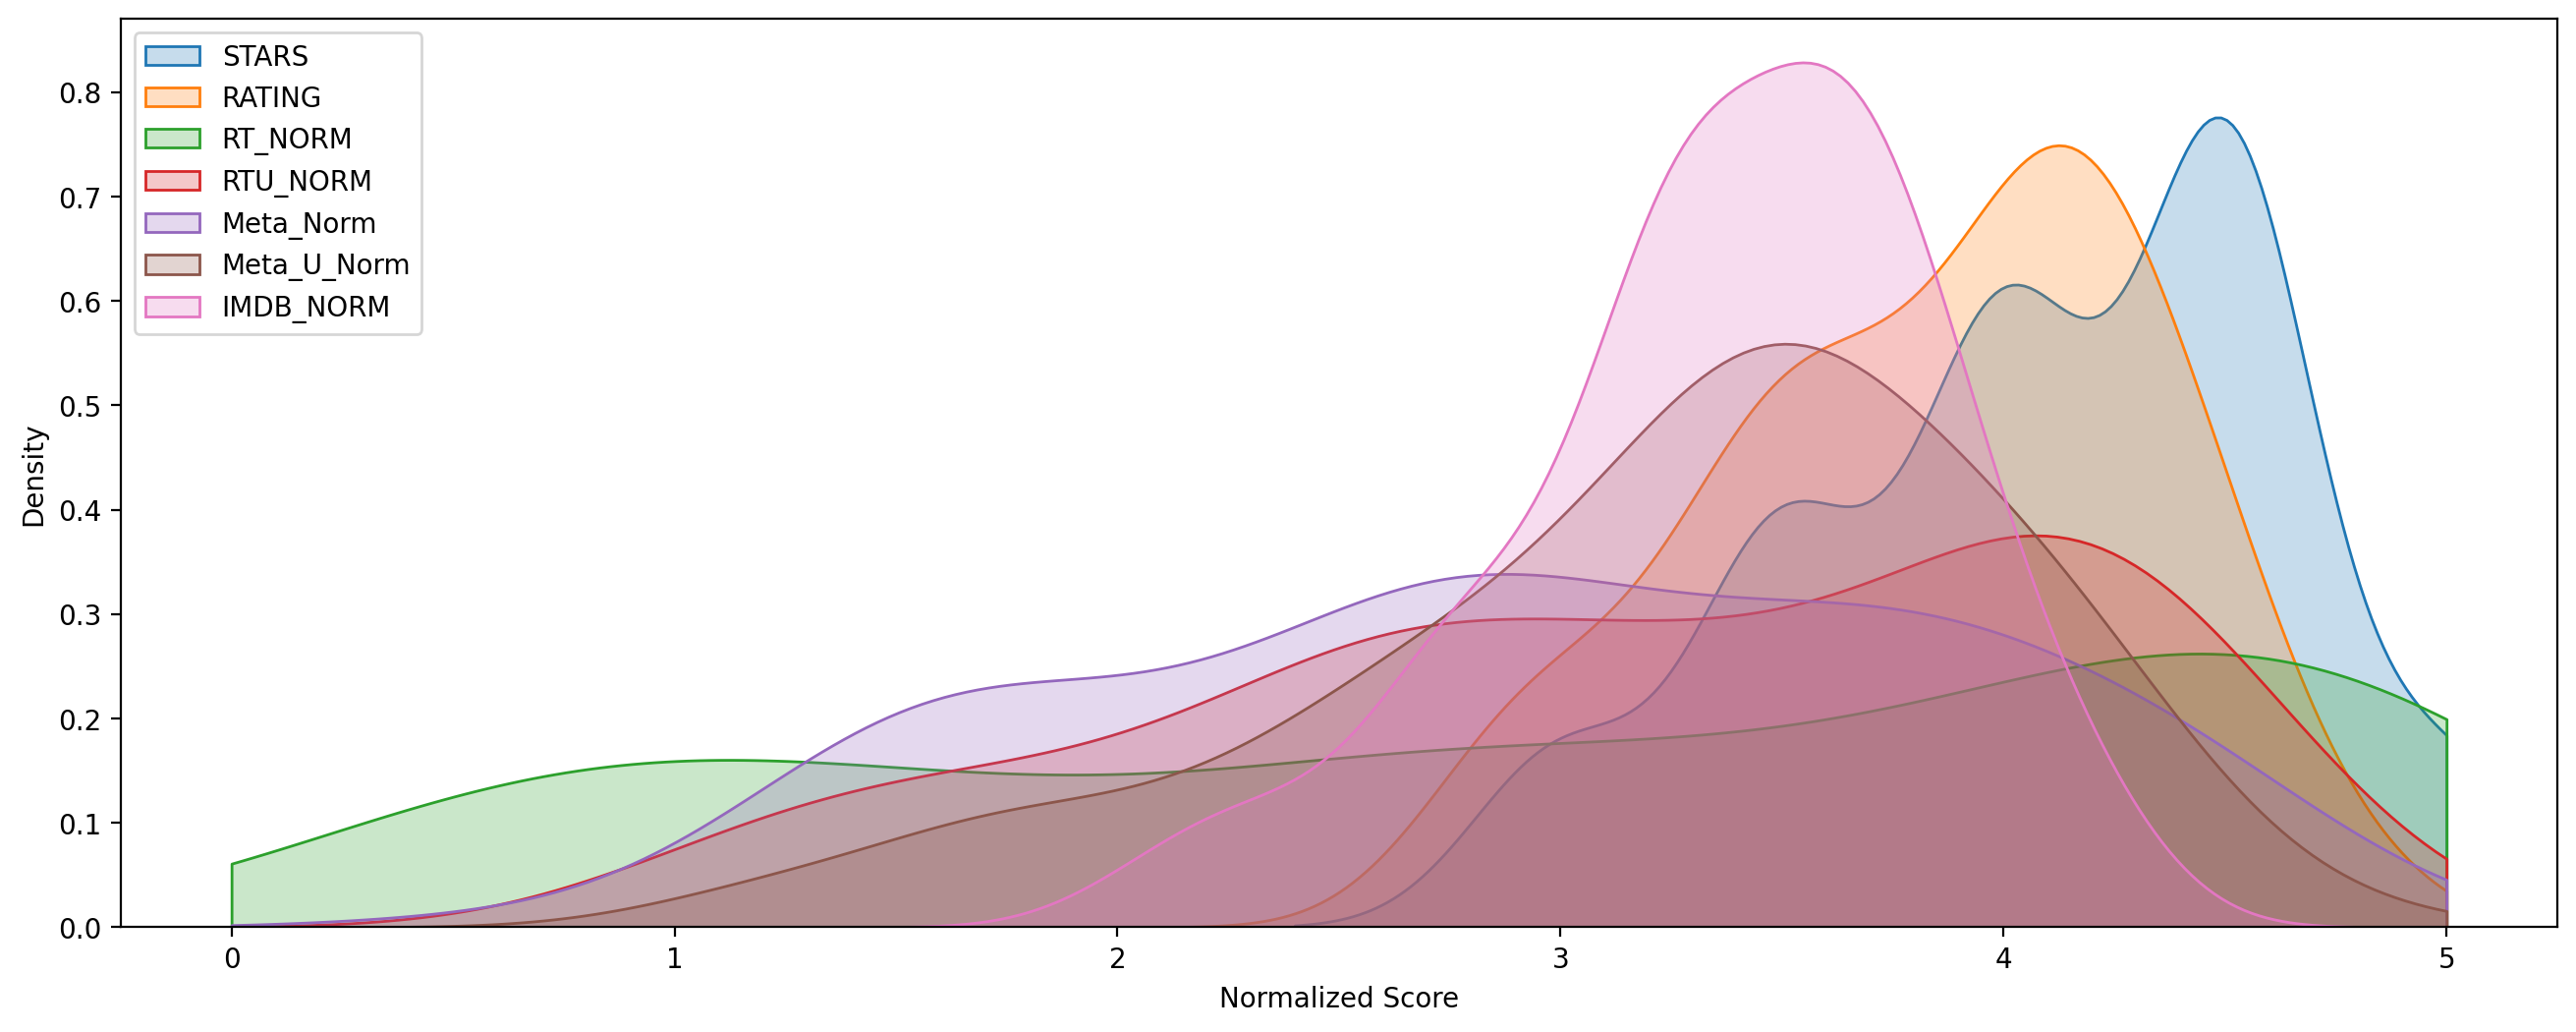

In [ ]:
plt.figure(figsize = (16,6) , dpi = 200)
sns.kdeplot(data = norm_scores ,x = 'STARS',fill = True , clip = [0,5] , label = 'STARS')
sns.kdeplot(data = norm_scores ,x = 'RATING',fill = True , clip = [0,5] , label = 'RATING')
sns.kdeplot(data = norm_scores ,x = 'RT_NORM',fill = True , clip = [0,5] , label = 'RT_NORM')
sns.kdeplot(data = norm_scores ,x = 'RTU_NORM',fill = True , clip = [0,5] , label = 'RTU_NORM')
sns.kdeplot(data = norm_scores ,x = 'Meta_Norm',fill = True , clip = [0,5] , label = 'Meta_Norm')
sns.kdeplot(data = norm_scores ,x = 'Meta_U_Norm',fill = True , clip = [0,5] , label = 'Meta_U_Norm')
sns.kdeplot(data = norm_scores ,x = 'IMDB_NORM',fill = True , clip = [0,5] , label = 'IMDB_NORM')
plt.legend(loc='upper left') 
plt.xlabel("Normalized Score")
plt.ylabel("Density")


**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

Text(0, 0.5, 'Density')

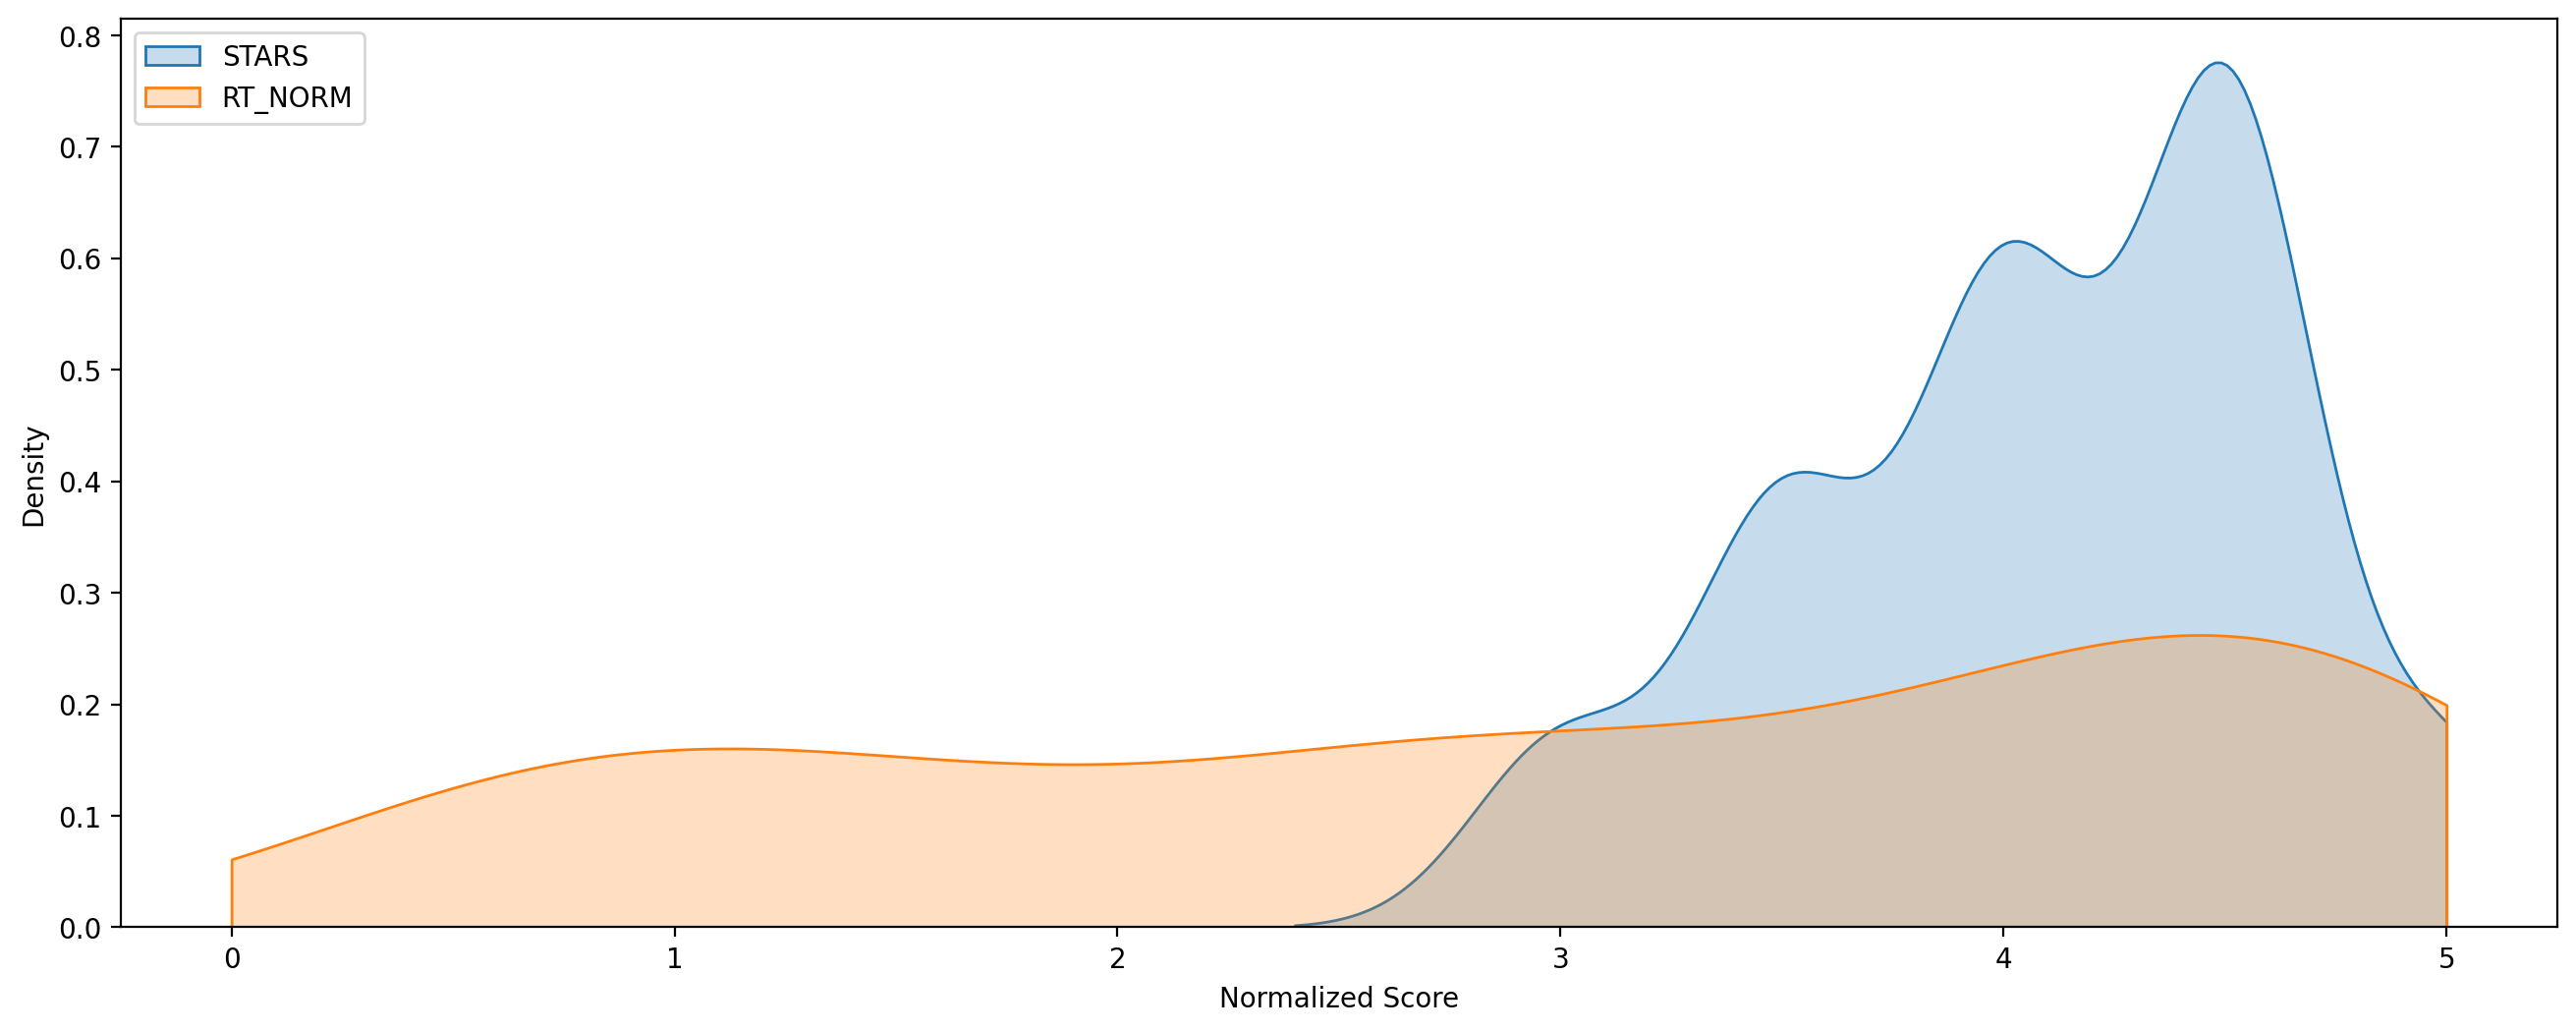

In [ ]:
plt.figure(figsize = (16,6) , dpi = 200)
sns.kdeplot(data = norm_scores ,x = 'STARS',fill = True , clip = [0,5] , label = 'STARS')
sns.kdeplot(data = norm_scores ,x = 'RT_NORM',fill = True , clip = [0,5] , label = 'RT_NORM')
plt.legend(loc='upper left') 
plt.xlabel("Normalized Score")
plt.ylabel("Density")


Text(0, 0.5, 'No. of Movies')

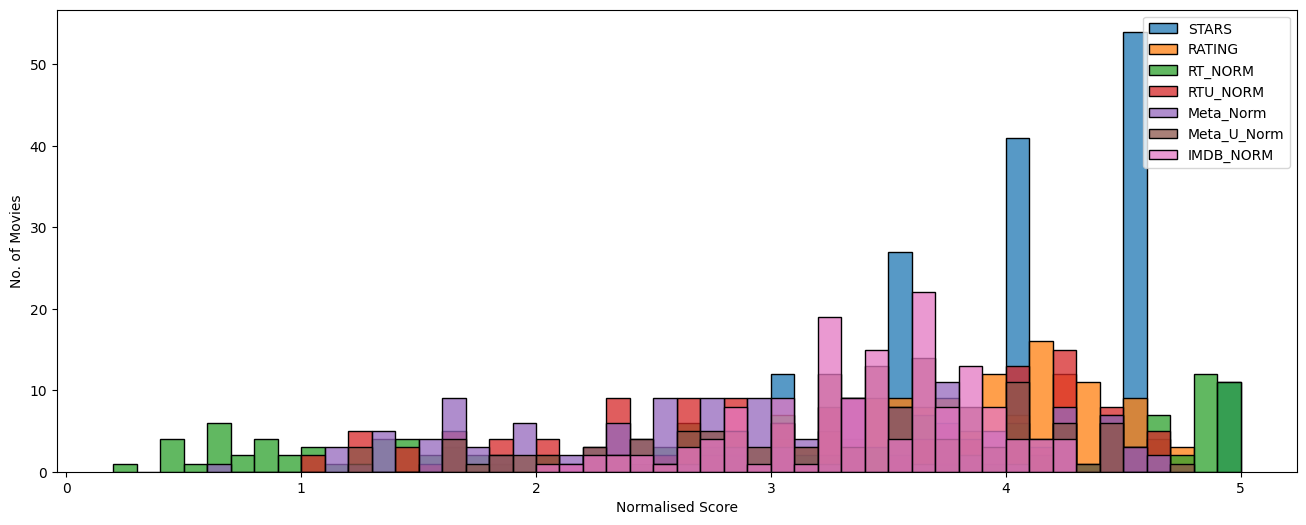

In [ ]:
plt.figure(figsize = (16,6))
sns.histplot(data = norm_scores , x = 'STARS' , binwidth = 0.1 , label = 'STARS')
sns.histplot(data = norm_scores , x = 'RATING' , binwidth = 0.1 , label = 'RATING')
sns.histplot(data = norm_scores , x = 'RT_NORM' , binwidth = 0.1, label = 'RT_NORM')
sns.histplot(data = norm_scores , x = 'RTU_NORM' , binwidth = 0.1, label = 'RTU_NORM')
sns.histplot(data = norm_scores , x = 'Meta_Norm' , binwidth = 0.1, label = 'Meta_Norm')
sns.histplot(data = norm_scores , x = 'Meta_U_Norm' , binwidth = 0.1, label = 'Meta_U_Norm')
sns.histplot(data = norm_scores , x = 'IMDB_NORM' , binwidth = 0.1, label = 'IMDB_NORM')
plt.legend(loc = 'upper right')
plt.xlabel('Normalised Score')
plt.ylabel('No. of Movies')



### How are the worst movies rated across all platforms?

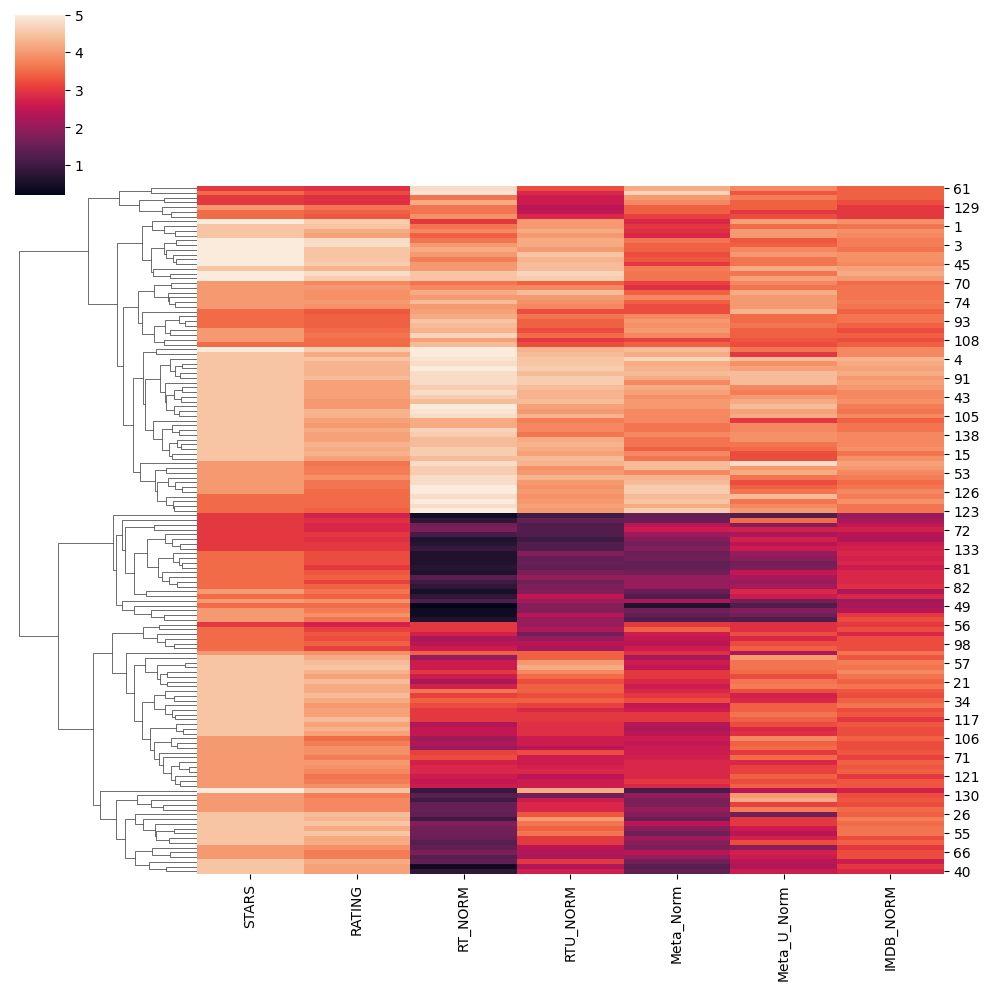

In [ ]:
sns.clustermap(norm_scores,col_cluster = False)


**TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies**

In [ ]:
norm_scores = complete_sites[['STARS' , 'RATING' , 'RT_NORM' , 'RTU_NORM' , 'Meta_Norm' , 'Meta_U_Norm' , 'IMDB_NORM' , 'FILM']].copy()


In [ ]:
norm_scores.head()


,STARS,RATING,RT_NORM,RTU_NORM,Meta_Norm,Meta_U_Norm,IMDB_NORM,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [ ]:
norm_scores.nsmallest(10,'RT_NORM')


,STARS,RATING,RT_NORM,RTU_NORM,Meta_Norm,Meta_U_Norm,IMDB_NORM,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Lets visualize the distribution of ratings across all sites for the top 10 worst movies.**

In [ ]:
norm_ = norm_scores.nsmallest(10,'RT_NORM')


In [ ]:
norm_.drop('FILM' , axis = 1)


,STARS,RATING,RT_NORM,RTU_NORM,Meta_Norm,Meta_U_Norm,IMDB_NORM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7


Text(0.5, 1.0, 'Ratings for 10 worst movies across all sites')

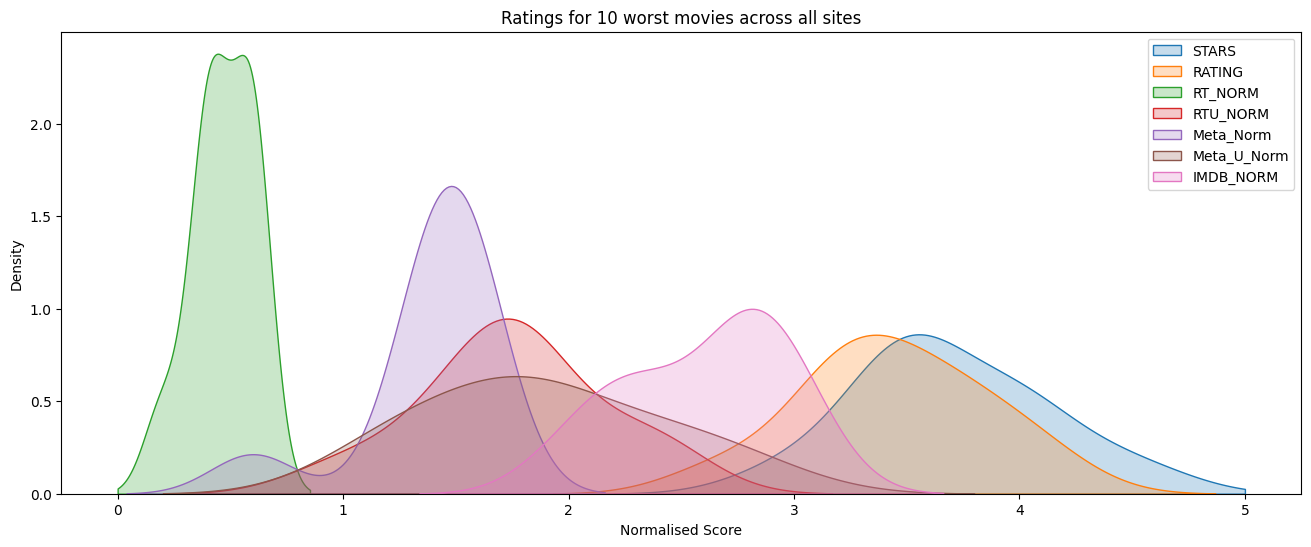

In [ ]:
plt.figure(figsize = (16,6))
sns.kdeplot(data = norm_ , x = 'STARS' , fill = True , clip = [0,5] , label = 'STARS')
sns.kdeplot(data = norm_ , x = 'RATING' , fill = True , clip = [0,5] , label = 'RATING')
sns.kdeplot(data = norm_ , x = 'RT_NORM' , fill = True , clip = [0,5] , label = 'RT_NORM')
sns.kdeplot(data = norm_ , x = 'RTU_NORM' , fill = True , clip = [0,5] , label = 'RTU_NORM')
sns.kdeplot(data = norm_ , x = 'Meta_Norm' , fill = True , clip = [0,5] , label = 'Meta_Norm')
sns.kdeplot(data = norm_ , x = 'Meta_U_Norm' , fill = True , clip = [0,5] , label = 'Meta_U_Norm')
sns.kdeplot(data = norm_ , x = 'IMDB_NORM' , fill = True , clip = [0,5] , label = 'IMDB_NORM')
plt.legend(loc = 'upper right')
plt.xlabel('Normalised Score')
plt.ylabel('Density')
plt.title('Ratings for 10 worst movies across all sites')


---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [ ]:
norm_scores.head()


,STARS,RATING,RT_NORM,RTU_NORM,Meta_Norm,Meta_U_Norm,IMDB_NORM,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [ ]:
norm_scores['AVG_RATING_EXCEPT_FANDANGO'] = (norm_scores['RT_NORM'] + norm_scores['RTU_NORM'] + norm_scores['Meta_Norm'] + norm_scores['Meta_U_Norm'] + norm_scores['IMDB_NORM']) / 5


In [ ]:
norm_scores['DIFF'] = norm_scores['STARS'] - norm_scores['AVG_RATING_EXCEPT_FANDANGO']


In [ ]:
norm_scores.nlargest(10 , 'DIFF')


,STARS,RATING,RT_NORM,RTU_NORM,Meta_Norm,Meta_U_Norm,IMDB_NORM,FILM,AVG_RATING_EXCEPT_FANDANGO,DIFF
67,5.0,4.5,0.9,4.2,1.1,2.4,2.7,Do You Believe? (2015),2.26,2.74
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015),1.86,2.64
40,4.5,4.1,0.8,2.7,1.4,2.6,2.8,Pixels (2015),2.06,2.44
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015),1.60,2.40
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015),1.64,2.36
24,4.5,4.2,1.4,3.0,1.6,2.4,2.6,Annie (2014),2.20,2.30
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015),1.20,2.30
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015),1.76,2.24
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015),1.78,2.22
26,4.5,4.4,1.4,3.3,1.8,1.6,3.4,The Wedding Ringer (2015),2.30,2.20


In [ ]:
norm_scores.iloc[25]


STARS                                    4.5
RATING                                   4.1
RT_NORM                                  0.4
RTU_NORM                                 2.3
Meta_Norm                                1.3
Meta_U_Norm                              2.3
IMDB_NORM                                3.0
FILM                          Taken 3 (2015)
AVG_RATING_EXCEPT_FANDANGO              1.86
DIFF                                    2.64
Name: 25, dtype: object

In [ ]:
4.1 - 1.86


2.2399999999999993

In [ ]:
0.4+2.3+1.3+2.3+3


9.3

In [ ]:
9.3/5


1.86

----